# Linear Regression <img src="reports/icon.png" align="center" height=auto width=10%/>

O algoritmo de _linear regression_ tem o objetivo de encontrar a melhor reta que se ajusta nos dados.


Basicamente a ideia de uma _linear regression_ é dar pequenos espaços entre os pontos para que a reta se aproxime de todos os pontos.

## Summary
  - [Advantages](#advantages)
  - [Disadvantages](#disadvantages)
  - [Linear Regressions Types](#linear-regressions-types)
    - [Linear Regression](#linear-regression)
    - [Polinomial Regression](#polinomial-regression)
    - [Lasso Regression](#lasso-regression)
    - [Ridge Regression](#ridge-regression)
  - [Cost Functions](#cost-functions)
  - [Gradient Descent](#gradient-descent)
  - [Regularization](#regularization)
  - [Prepearing Data for Linear Regression](#prepearing-data-for-linear-regression)
  - [Modeling Linear Models](#modeling-linear-models)
  - [Examples](examples)
    - [IMC](examples/imc)
    - [linear_to_polynomial_regression](examples/linear_to_polynomial_regression)
    - [pricing_house](examples/pricing_house)
    - [simple_linear_regression](#examples/simple_linear_regression)

## **Advantages**
- Otima solução quando a relação entre as variáveis dependentes(y) e independentes(x) geram uma linha. 
- Bom para encontrar **correlação entre features**
- Bom de encontrar **outliers**
- Quando tentar prever um valor contínuo - como preço, demanda, ou um índice qualquer - sempre comece usando regressão linear.
- Mesmo com milhões de dados, é possível estimar os parâmetros em menos de um segundo.
- O regressor **ocupa pouco espaço**, pois só armazena um vetor w. 
- O modelo de regressão linear é de longe o mais utilizado em econometria.

## **Disadvantages** 

#### Linear Regression
A regressão linear nem sempre é a melhor escolha dependendo da situação. Exemplos:
- **Regressão linear funciona melhor quando os dados são lineares:** 
A regressão linear produz um modelo que é uma linha reta extraída a partir dos dados de treinamento

<img src="reports/output_30_0.png" align="center" height=auto width=50%/>

Uma grande limitação do modelo de regressão linear é que a máquina não aprende a forma da não linearidade, ficando essa parte sob responsabilidade da pessoa que está montando o modelo.
 Em outras palavras, é preciso codificar à força a não linearidade no algoritmo e isso é feito forjando variáveis novas. 

- **Regressões lineares são sensíveis a outliers:** 
A regressão linear tenta encontrar a linha que "melhor se encaixa" nos dados de treinamento. Caso o conjunto de dados tenha valores extremos que fujam muito do padrão geral, eles podem ter um efeito inesperadamente grande no modelo.

<img src="reports/output_32_0.png" align="center" height=auto width=50%/>


#### Polynomial Regression
- Problema de overfit que gera uma lata variância


<img src="reports/overfit.png" align="center" height=100% width=60%/>

- não funciona bem quando temos muitas variáveis e o grau do polinômio é muito alto


#### Logistic Regression

**TODO**

---

# **Linear Regressions Types**
Até 100k linhas pode ser usado os modelos abaixo, acima disso é recomendado usar algum modelo de deep learning.

## Linear Regression

<img src="reports/output_4_0.png" align="center" height=100% width=60%/>

O **w** tambem é chamado de preditor.

<img src="reports/output_5_0.png" align="left" height=100% width=60%/>

<img src="reports/output_6_0.png" align="right" height=100% width=60%/>

<img src="reports/output_7_0.png" align="left" height=100% width=60%/>

<img src="reports/output_8_0.png" align="right" height=100% width=60%/>

<img src="reports/output_9_0.png" align="left" height=100% width=60%/>

## Multiple Linear Regression

A regressão linear simples é útil para prever o valor de uma variável dependente por uma variável independente. Contudo, este tipo de regressão não é muito útil no contexto real pois sempre há mais de um fator que pode influenciar uma variável dependente (y).


Por exemplo, no caso abaixo temos o preço das casas (y = variável dependente) que é afetado pela qualidade de ensino das escolas proximas (x1) e pelo tamanho da casa(x2). 

<img src="reports/output_24_0.png" align="center" height=100% width=60%/>

A partir disso, observamos que o preço de uma casa (y) pode ser afetado (ser dependente) por N variáveis(x).

<img src="reports/output_26_0.png" align="center" height=100% width=60%/>

<img src="reports/output_27_0.png" align="center" height=100% width=60%/>

<img src="reports/output_28_0.png" align="center" height=100% width=60%/>

## Polinomial Regression
_E com duas ou três variáveis posso fazer uma regressão polinonial_

É possível utilizar o fato de estender regressão linear para regressão polinomial. A ideia é bastante simples: a partir das variáveis existentes, nós vamos construindo novas variáveis polinomiais e a regressão com elas terá mais capacidade quanto maior o grau do polinômio criado. É importante ressaltar que o algoritmo de regressão linear não muda!

<img src="reports/poly.png" align="center" height=50% width=40%/>


- Uma técnica comum em machine learing é usar _linear models_ treinados em dados não lineares.
- A grande vantagem é a radipez para treinamento
-  Uma regressão linear simples pode ser estendida através da construção de features polinomiais a partir dos coeficientes.
- Ex

In [116]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# data
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [117]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

As features de `X` foram transformados de `[a, b]` para `[1, a, b, a^2, ab, b^2]`, e agora pode ser usado em qualquer modelo linear.

#### Quando usar uma regressão polinomial?

É recomendável utilizar regressão polinomial apenas em casos de não linearidades mais simples (**até grau = 2**), por exemplo quando se desconfia de alguma relação marginalmente (imagem abaixo).


<img src="reports/marginal_decrese.png" align="center" height=50% width=40%/>

#### Creating Polynomial Model

In [1]:
#### Import

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Data
df = pd.read_csv('data/raw/pressure_temperature.csv')
X = df.iloc[:, 1:2].values 
y = df.iloc[:, 2].values 

print(df.head())
print(X.shape)
print(y.shape)

   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
(6, 1)
(6,)


#### Linear Model

In [105]:
# Fitting Linear Regression
lr_model = LinearRegression() 
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

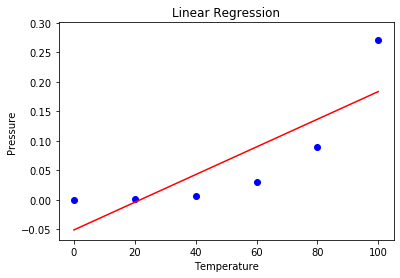

In [106]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lr_model.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

#### Polynomial Model

In [109]:
# Fitting Polynomial Regression
poly = PolynomialFeatures(degree=4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
polymonial_model = LinearRegression() 
polymonial_model.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

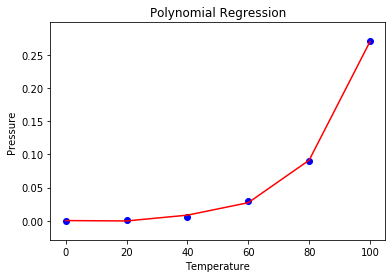

In [110]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, polymonial_model.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

#### Tradeoff 
 
O modelo com polinômio de grau 4 acerta mais os dados mas é provável que a **_varience_ dele seja muito alta**, podendo comprometer a performance de generalização.

Por outro lado, o modelo com polinômio de grau 1 não consegue sequer capturar as curvaturas dos dados de treino. Assim, podemos especular que esse modelo **tem _bias_ muito baixo**.

<img src="reports/overfit.gif" align="center" height=50% width=40%/>


## Logistic Regression Classification
- Logistic Regression = Logistic Classification


**TODO**
- https://matheusfacure.github.io/2017/02/25/regr-log/

---

## **Cost Function**
- É a diferença entre o valor real e o valor predito.
- Resíduo = erro médio absoluto
- Cost Function = Error Function 


#### Cost ?
Uma função que mapeia um evento ou valores de uma ou mais variáveis ​​para um número real, representando intuitivamente algum "custo" associado ao evento.

<img src="reports/variables_linear_regression.png" align="center" height=100% width=60%/>

<img src="reports/output_11_0.png" align="center" height=100% width=60%/>

<img src="reports/output_12_0.png" align="center" height=100% width=60%/>

### MSE(Mean Squared Error) 
É possivel calcular um erro médio quadrático.

<img src="reports/output_14_0.png" align="center" height=100% width=60%/>

<img src="reports/mse.png" align="center" height=100% width=60%/>

 - OBS: a única difrença para o que eu vi em técnicas estatíticas de predição foi a derivação da fórmula.
 
### Comparison of error types

<img src="reports/output_17_0.png" align="center" height=100% width=60%/>

#### Mean absolute error
Indiferente da reta, sempre dará o mesmo tamanho de erro.

#### Mean Square Error
Neste caso temos uma função de 2º grau, onde a linha B se encontra no ponto mais baixo.

<img src="reports/output_20_0.png" align="center" height=100% width=60%/>


#### Mean absolute error x Mean Square Error

<img src="reports/cost-median-mean.png" align="center" height=100% width=60%/>

- Quando usar um e outro ?
Na prática, depende muito pois o que causa é a alteração no _learning rate_.

In [32]:
import matplotlib.pyplot as plt
import numpy as np


# original data
X = [1, 2, 3]
y = [1, 2.5, 3.5]


hyps = 1.0 

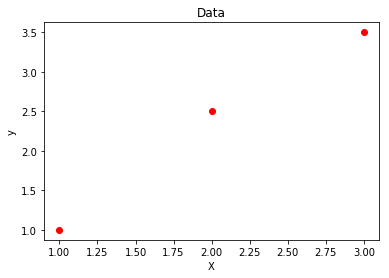

In [33]:
# Draw input, output and answer line
plt.plot(X, y, "ro")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Data")
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error 


Y_true = [1, 1, 2, 2, 4]
Y_pred = [0.6, 1.29, 1.99, 2.69, 3.4]

#### Using scikit-learn

In [24]:
mean_squared_error(Y_true, Y_pred)

0.21606

#### Using Numpy

In [25]:
def mean_square_error_np(Y_true: list, Y_pred: list):
    """
    :Params:
        Y_true: list of true values    
        Y_pred: list of predicted values
    
    :Returns:
        mean square error loss
    """
    Y_true = np.asarray(Y_true)
    Y_pred = np.asarray(Y_pred)
     
    return ((Y_true - Y_pred)**2).mean()

In [26]:
mean_square_error_np(Y_true, Y_pred)

0.21606

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# number of points
num_points = 300

# For the sample data
# Answer values
x_ans = [i * 0.01 for i in range(-200, 200)]
W_ans = 0.1

# Generate normal random values for input and output
x = [np.random.normal(0.0, 0.55) for i in range(num_points + 1)]
y = [W_ans * _x + np.random.normal(0.0, 0.03) for _x in x]

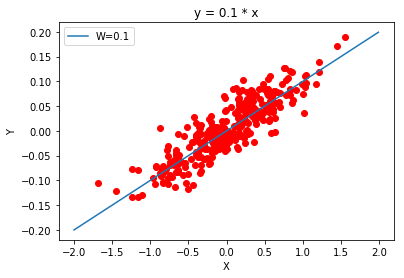

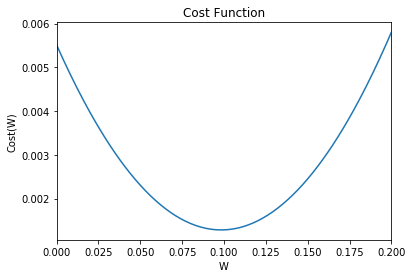

In [47]:
# Draw input, output and answer line
plt.plot(x, y, "ro")
plt.plot(x_ans, [W_ans * _x for _x in x_ans], label="W=0.1")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("y = 0.1 * x")
plt.show()

# For the Mean Square Error
# Weight from 0 to 0.2
W = [i * 0.001 for i in range(0, 201)]
# Cost
cost = []

for w in W:
    # hypothesis = W * x
    hypo = [w * _x for _x in x]

    diffSqrts = list(map(lambda _hypo, _answer : \
                                (_hypo - _answer) ** 2, hypo, y))
    sumDiffSqrt= sum(diffSqrts)

    cost.append(1 / (len(W)) * sumDiffSqrt)

# Draw cost function
plt.plot(W, cost)
plt.title("Cost Function")
plt.xlabel("W")
plt.ylabel("Cost(W)")
plt.xlim(0.00, 0.20)
plt.show()

---

## **Gradient Descent**
_Gradient Descent is the method by which we make our model learn._

<img src="reports/gradient_decent.gif" align="center" height=100% width=60%/>

<img src="reports/gratient_cost.png" align="center" height=100% width=60%/>

- Gradiente é uma função vetorial que representa a inclinação e sentido da tangente na função cost.
- O símbolo ∇ (nabla) representa o gradiente.
- É **algoritmo de otimização** para encontrar mínimo local.
- Gradient Descent = Learing Rate
- É recomendado para casos de com > 100 features

<img src="reports/less_100.png" align="center" height=100% width=60%/>

Menos que isso, a sugestão é usar algo analítico.


- No caso da nossa regressão linear por gradient descent, podemos distinguir três hiper-parâmetros:
  - A learning rate
  - O número de iterações de treino
  - Os valores iniciais de w^w^

W = W - \alpha {\partial \over\partial W} cost(W, b)

b = b - \alpha {\partial \over\partial b} cost(W, b)


αα é uma taxa de aprendizado. taxa de aprendizado é quanto salto ao longo da função de custo. Se for grande, W e b mudarão muito. 

a taxa de aprendizado é um valor ajustável e, geralmente, é menor que 1. Além disso, durante a execução do teste, é bom alterar os valores pequenos.

### Running
A descida do gradiente em lote, também conhecida como descida do gradiente de baunilha, calcula o erro de cada observação no conjunto de dados, mas executa uma atualização somente após todas as observações terem sido avaliadas.

A descida do gradiente em lote não é frequentemente usada, pois representa um enorme consumo de recursos computacionais, pois todo o conjunto de dados precisa permanecer na memória.

### Mount Example
- Imagine que vc esta no alto de uma montanha e deseja descer de olhos fechados.

<img src="reports/gradient_descent.gif" align="center" height=100% width=60%/>

<img src="reports/gradient_descent.png" align="center" height=100% width=60%/>

<img src="reports/gradient_descent_2.png" align="center" height=100% width=60%/>

<img src="reports/gradient_descent_3.png" align="center" height=100% width=60%/>


### Speed
Quando falamos de uma bolinha de gude deslizando para o fundo de uma tigela, podemos visualizar a bolinha começando com uma pequena velocidade e acelerando ao longo do trajeto. Com gradiente descendente ocorre o oposto: inicialmente, os parâmetros b^ e w^ caminham rapidamente em direção ao ponto de mínimo e, quanto mais se aproximam dele, passam a caminhar cada vez mais devagar.

#### Why ?
Quanto mais próximos estamos do ponto de mínimo, menor a inclinação da função custo, OU SEJA menor o gradiente, OU SEJA, menor o passo dado em direção ao mínimo.


### Visualization
- Para minimizar os erros basta calcular a derivada da função de erro.
- Use a regra da cadeia
- Quanto mais baixo estiver o valor de _error_, menor é a taxa de aprendizagem α.

<img src="reports/gardient_descent_mat.png" align="center" height=100% width=60%/>

<img src="reports/random.gif" align="center" height=100% width=60%/>

### Implementation
1. Insira parâmetros aleatórios
2. Calcule a _cost fucntion_
3. Aplique a regra da cadeia na _cost function_ até encontrar o menor valor

<img src="reports/graddesc.gif" align="center" height=100% width=60%/>

In [114]:
X = 3
learning_rate = 0.01 # Learning rate
precision = 0.000001 # Stop loop
previous_step_size = 1 
max_iters = 10000 # Maximum number of iterations
count = 0 # Iteration counter

# derivate cost function
derivative_function = lambda x: 2*(x+5) 

In [115]:
while previous_step_size > precision and count < max_iters:
    current_x = X
    X = X - learning_rate * derivative_function(current_x) # Grad descent
    
    previous_step_size = abs(X - current_x)
    count = count + 1
    # print("Iteration",count,"\nX value is",X) 
    
print("The local minimum at", X)

The local minimum at -4.9999518490318176


In [55]:
# Input
X = np.array([ [70, 80, 75], \
               [90, 90, 90], \
               [50, 70, 80], \
               [80, 90, 85], \
               [90, 95, 90] ])

# Answer
Y = np.array([ [75], \
               [95], \
               [70], \
               [95], \
               [95] ])

# Weight
# W = np.full((3, 1), np.random.normal(0, 10))
# In this test, we have only 5 instances.
# Therefore, if W is started from too far, the result will be weird.
# So, I just picked closed value for the pre-trained W.
W = np.array([ [0.4], \
               [0.15], \
               [0.5] ])

# Learning rate
learning_rate = 0.0001

costs = []
steps = []

nb_train = 10

In [50]:
import numpy as np
import matplotlib.pyplot as plt

nr_student = 5

def calc_cost(W):
    # hypothesis = X * W
    hypo = np.dot(X, W)

    _mse = list(map(\
            lambda _hypo, _answer : (_hypo[0] - _answer[0]) ** 2, hypo, Y))

    sumMse = sum(_mse)

    # 1 / m * sum(X * W - Y)^2
    return 1 / nr_student * sumMse


def calc_gradient(W):
    # Euler method to calculate derivative
    # h is delta of W
    h = 1e-4

    # Defines the same size matrix with W
    grad = np.zeros_like(W)

    # For partial derivatives
    for i in range(W.size):
        tmp_val = W[i]

        # Calculate forward values
        W[i] = tmp_val + h
        fxh1 = calc_cost(W)

        # Calculate backward values
        W[i] = tmp_val - h
        fxh2 = calc_cost(W)

        # Calculate the diff
        grad[i] = (fxh1 - fxh2) / (2*h)

        W[i] = tmp_val

    return grad

In [52]:
# Training
for i in range(nb_train):
    # Calculate cost
    _cost = calc_cost(W)

    # Calculate gradient descent
    gradients = calc_gradient(W)

    # Value for descent
    DV = learning_rate / nr_student * gradients

    # Update W
    W = W - DV

    steps.append(i)
    costs.append(_cost)

In [53]:
# Test
x = np.array([80, 80, 80])
y = np.dot(x, W)
print("Answer: {0}".format(y))

Answer: [84.92898915]


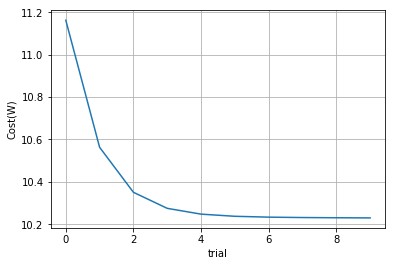

In [54]:
plt.plot(steps, costs, label="Costs")
plt.xlabel("trial")
plt.ylabel("Cost(W)")
plt.grid()
plt.show()

#### Cost Function with TensorFlow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Y = X
X = [1,2,3]
Y = [1,2,3]

# Weight
W = tf.placeholder(tf.float32)

# Simplified hypothesis for linear model X * W
hypothesis = X * W

# Cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.title("Cost function")
plt.xlabel("W")
plt.ylabel("Cost(W)")
plt.show()

## Convex Function
- O Algoritmo de Descida de Gradiente usa derivada parcial, por isso tem um problema.

- It tries to find a point which is local minimum. However, local minimum can be placed in several points, not only one, like below image. Therefore, we should find global minimum which is the lowest point.

<img src="reports/gradient_decent.gif" align="center" height=100% width=60%/>

- o valor inicial é muito importante para este caso.
- Portanto, ao resolver um problema com o aprendizado de máquina, tente encontrar a função de custo que é convexa. Caso contrário, você precisará de algumas técnicas para encontrar um melhor ponto de partida e fazer o aprendizado de máquina com vários pontos de partida.

---

## **Regularization**
_Regularization basically adds the penalty as model complexity increases._


<img src="reports/regularization_g.gif" align="center" height=100% width=60%/>

- É uma técnica para evitar overfit
- Tranforma modelos complexos em modelos mais simples
- É usado para regressão linear e polinomial
- Ex

<img src="reports/regularizaion.png" align="center" height=100% width=60%/>

#### Complexity Calculate
Para calcular qual modelo generaliza melhor é preciso calcular a complexidade:

```
complexity = error + coefficients
```

<img src="reports/regularization_2.png" align="center" height=100% width=60%/>



#### Rugularization Types

Há 2 tipos de regularização
- Lasso - L1

<img src="reports/regularization_ex_1.png" align="center" height=100% width=60%/>

<img src="reports/regularization_ex_2.png" align="center" height=100% width=60%/>

- Rigde - L2

<img src="reports/l2_reg.png" align="center" height=100% width=60%/>

<img src="reports/l2_reg_2.png" align="center" height=100% width=60%/>

#### Comparation
<img src="reports/sheet_cheat_regu.png" align="center" height=100% width=60%/>

### Comparation Linear, Lasso and Ridge Regression

In [13]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [14]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.linear_model import Lasso


linear_regression_regularization_l1 = Lasso(alpha=0.1)
linear_regression_regularization_l1.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
from sklearn.linear_model import Ridge


linear_regression_regularization_l2 = Ridge(alpha=0.1)
linear_regression_regularization_l2.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Predict

In [17]:
linear_regression.predict([[1, 1]])

array([1.])

In [18]:
linear_regression_regularization_l1.predict([[1, 1]])

array([0.8])

In [19]:
linear_regression_regularization_l2.predict([[1, 1]])

array([0.95454545])

#### Other Regularization Techniques

- Dimensionaly reduction
- Data augmentation
- Dropout
- Early Stopping

## Prepearing Data for Linear Regression

#### Linear Assumption
A linear regression assume que o relacionamento entre as features de entrada e saída é linear. 


#### Remove Noise
As features de entrada e saída não tem outliers.

#### Remove Collinearity
A linear regression ajustará em excesso seus dados quando você tiver variáveis ​​de entrada altamente correlacionadas. Considere calcular correlações aos pares para seus dados de entrada e remover as mais correlacionadas.

#### Gaussian Distributions
A linear regression fará previsões mais confiáveis se as features tiverem uma distribuição gaussiana. Aplicar transformações como log() pode se um auxilio.

#### Rescale Inputs
a linear regression geralmente fará previsões mais confiáveis ​​se você redimensionar variáveis ​​de entrada usando padronização ou normalização.

---

## **Modeling Linear Models**

1. Insira uma _linear regression_ em qualquer ponto do gráfico

<img src="reports/mean.png" align="center" height=100% width=60%/>

2. Em seguida, calcule a **cost function**
3. Para encontrar o melhor local onde a reta se encaixa nos dados, calcule o **gradient descent**

<img src="reports/linear.png" align="center" height=100% width=60%/>

2. Caso os dados não sejam lineares será necessário **gerar um polinômio**. Começe pelo grau = 2

<img src="reports/poly_1.png" align="center" height=100% width=60%/>

3. Para diminuir o _bias_, é preciso **aumentar o grau do polinômio** para 10

<img src="reports/poly_2.png" align="center" height=100% width=60%/>

4. Agora, para garatir uma menor _variance_, será aplicado uma **regularization** no modelo

<img src="reports/poly_3.png" align="center" height=100% width=60%/>


#### Analysis Polynomial Model

- O modelo começa como uma _linear regression_ com _regularization_ e vai aumentando o grau do polinômio

<img src="reports/polinomial_regression.gif" align="center" height=50% width=40%/>

#### References
- [1] https://moodle.ufsc.br/pluginfile.php/1592338/mod_resource/content/1/An%C3%A1lise%20da%20regres%C3%A3o.pdf
- [2] https://www.coursera.org/learn/machine-learning/
- [3] https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
- [4] https://en.wikipedia.org/wiki/Gradient_descent
- [5] https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- [6] https://matheusfacure.github.io/2017/02/16/ols-mechanics/
- [7] http://madrury.github.io/smoothers/

---